In [4]:
%pip install pandas 
%pip install nltk
%pip install PySastrawi
%pip install wordcloud
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install opencv-python



[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.1 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note

In [2]:
# import pandas as pd # untuk pemrosesan file csv
# import string # untuk melakukan tokenisasi
# import numpy as np # untuk memudahkan perhitungan pada array
# import re # untuk membantu proses tokenisasi
import nltk
# import matplotlib.pyplot as plt
# import seaborn as sns

import pandas as pd
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

from sklearn.model_selection import train_test_split
nltk.download('all')


import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/promedia/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/promedia/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/promedia/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/promedia/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/promedia/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /Users/promedia/nltk_d

In [4]:
# df = pd.read_csv('https://github.com/ibamibrahim/news-title-dataset/blob/master/detik_news_title.csv?raw=true')
# df['Judul'] = df['title']
# df['Kategori'] = df['category']

df = pd.read_csv('./samples/berita_completed.csv')

['Peristiwa Daerah' 'Indonesia Positif\t' 'Peristiwa Nasional\t'
 'Olahraga\t' 'Politik\t' 'Peristiwa' 'Pendidikan' 'Ekonomi'
 'Pemerintahan' 'Gaya Hidup' 'English' 'Wisata' 'Peristiwa Internasional'
 'Kesehatan' 'Hukum dan Kriminal' 'Entertainment' 'Kuliner' 'Tekno'
 'Otomotif']
['Otomotif' 'Tekno' 'Kuliner' 'Entertainment' 'Hukum dan Kriminal'
 'Kesehatan' 'Peristiwa Internasional' 'Wisata' 'English' 'Gaya Hidup'
 'Pemerintahan' 'Ekonomi' 'Pendidikan' 'Peristiwa' 'Politik\t'
 'Olahraga\t' 'Peristiwa Nasional\t' 'Indonesia Positif\t'
 'Peristiwa Daerah']
['Otomotif', 'Tekno', 'Kuliner', 'Entertainment', 'Hukum dan Kriminal', 'Kesehatan', 'Peristiwa Internasional', 'Wisata']


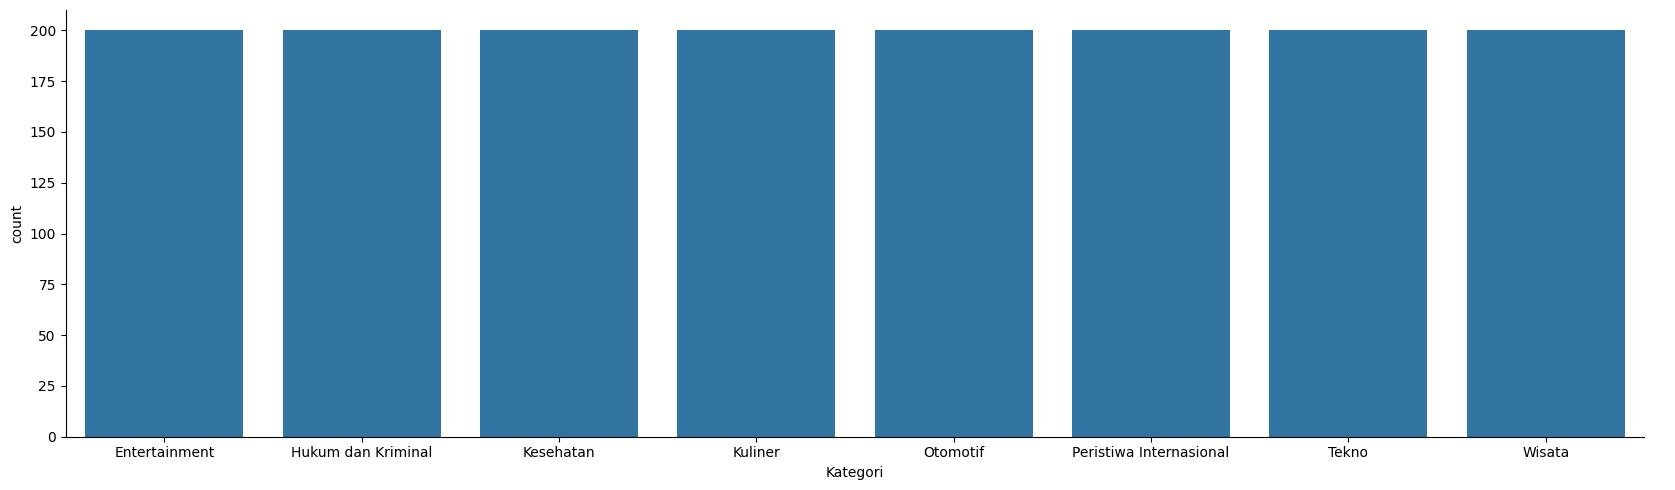

In [5]:
uniq_categories = []
categories = df['Kategori'].unique()
print(categories)
categories = categories[::-1]
print(categories)
for i in range(8):
    uniq_categories.append(categories[i])

print(uniq_categories)
df = df[df['Kategori'].isin(uniq_categories)]

temp = df.groupby(['Kategori']).size().reset_index().rename(
    columns={0: 'count'}).sort_values(by='count', ascending=False)
sns.catplot(x='Kategori', y='count', kind='bar',
            data=temp, height=5, aspect=10/3)
plt.show()

In [6]:
X = df[['Judul']]
y = df[['Kategori']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

print(f'Training size: {X_train.shape}')
print(f'Testing size: {X_test.shape}')

Training size: (1200, 1)
Testing size: (400, 1)


In [7]:
def bersihkanDataset(teks): 
  # casefolding
  # menghapus tab
  # menghapus baris baru
  # menghapus backslash
  teks = teks\
    .lower()\
    .replace('\\t'," ")\
    .replace('\\n'," ")\
    .replace('\\',"")

  # Menghapus karakter khusus
  teks = teks.encode('ascii', 'replace').decode('ascii')
  # menghapus tanda baca
  teks = teks.translate(str.maketrans("","",string.punctuation))
  # menghapus spasi di awal dan akhir kalimat
  teks = teks.strip()
  # menghapus dobel spasi
  teks = re.sub('\s+',' ',teks)
  # menghapus karakter tunggal
  teks = re.sub(r"\b[a-z]\b", "", teks)
  # menghapus angka
  teks = re.sub(r"[\d]+", "", teks)
  return teks


In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

sFactory = StemmerFactory()
stemmer = sFactory.create_stemmer()

file_stopword = open("./stopword.txt", "r") # r = read
stopwords = file_stopword.read().split('\n')
file_stopword.close()

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()


def stem(kalimat):
    stop = stopword.remove(kalimat)
    tokens = nltk.tokenize.word_tokenize(stop)
    clean = [kata for kata in tokens if kata not in stopwords]
    kalimat = ' '.join(clean)
    return stemmer.stem(kalimat)

In [9]:
def preprocess(kalimat):
    kalimat = bersihkanDataset(kalimat)
    return stem(kalimat)


X_train['Judul'] = X_train.Judul.apply(preprocess)
X_train['Judul'][:20]

2527    ppi istanbul ajak ajar asia tenggara kompetisi...
2454              anakanak jalur gaza bunuh gempur israel
2522             korban tinggal dunia kamp jabalia tambah
3361                      ragam sate patut coba idul adha
2706    rsu imanuel sumba timur luncur loket layan bpj...
3523    ti network ai luncur akademi ai wadah riset aj...
2954             dakwa rusa kantor arema fc vonis penjara
3164    kisah kocak kang ha neul jung so min pasutri a...
2694    biasa makan manis kurang aktivitas fisik tingk...
3483            manfaat iklan facebook google bisnis umkm
3250    nasi goreng anglo cita khas kediriyang goda lidah
2620    rumah sakit alat canggih buat islandia deteksi...
2286      rekomendasi kafe jalan mojosari pacet mojokerto
3458                    inovasi agi openai luncur chatgpt
3714    perhepi ub susun formula strategis hadap tanta...
2565                  terowongan india runtuh kerja jebak
2465        paksa ungsi ribu warga gaza henti pintu rafah
2487          

In [10]:
df_train = pd.merge(X_train, y_train, left_index=True, right_index=True)

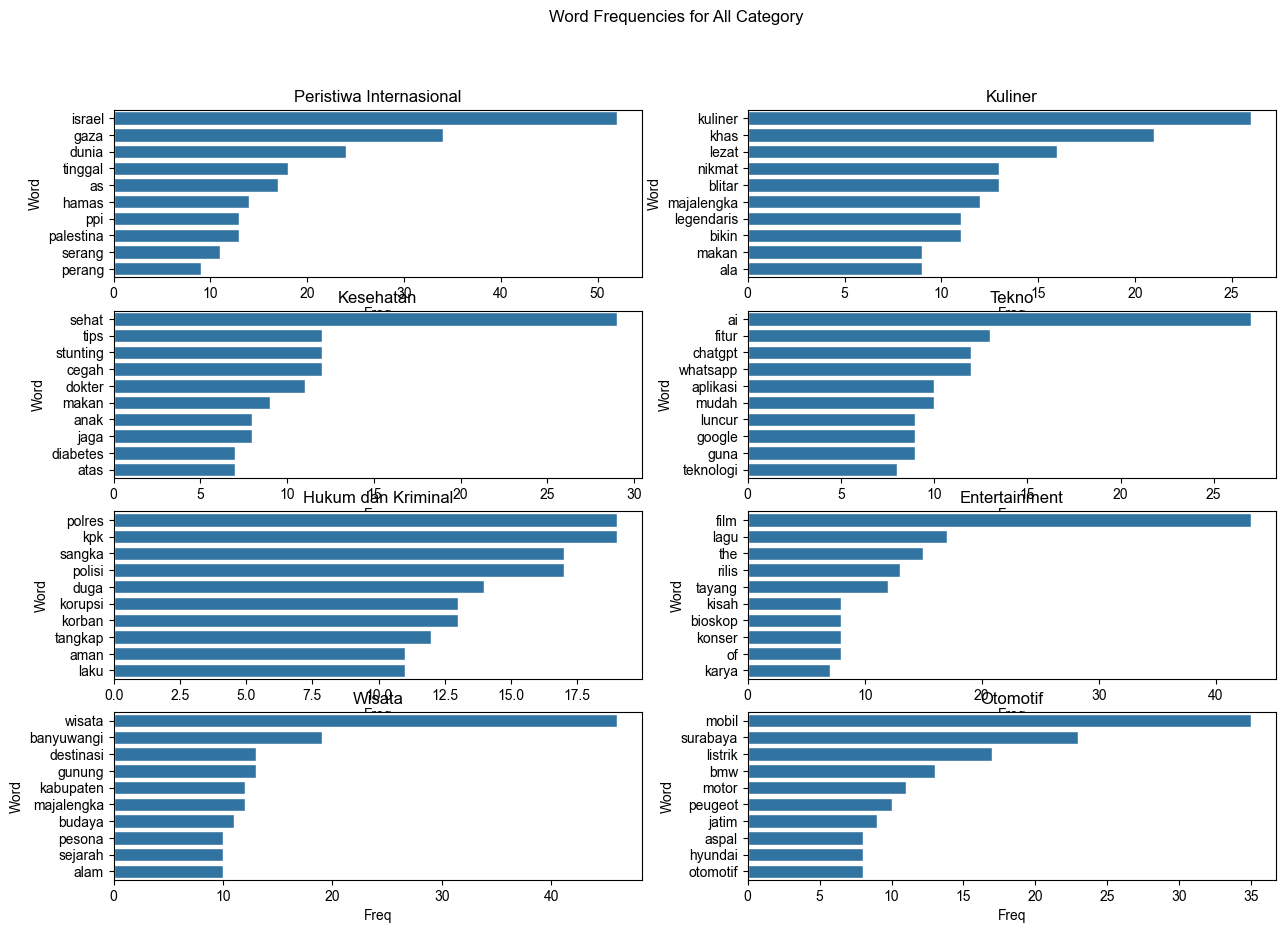

In [11]:

from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(data, category,axes,n=10):
    corpus = data[data.Kategori == category]['Judul']
    # corpus = corpus.apply(preprocess)
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    words_sum = bag_of_words.sum(axis=0)
    words_freq = [(word, words_sum[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    top_df = pd.DataFrame(words_freq[:n])
    top_df.columns=["Word", "Freq"]
    sns.set(rc={'figure.figsize':(15,8)})
    sns.barplot(ax=axes, x="Freq", y="Word", data=top_df)
    axes.set_title(category)

fig, axes = plt.subplots(4,2, figsize=(15,10))
fig.suptitle('Word Frequencies for All Category')
row = 0
col = 0
for cat in list(df_train.Kategori.unique()):
    get_top_words(df_train, cat, axes[row, col])
    col += 1
    if col == 2:
        col = 0
        row += 1

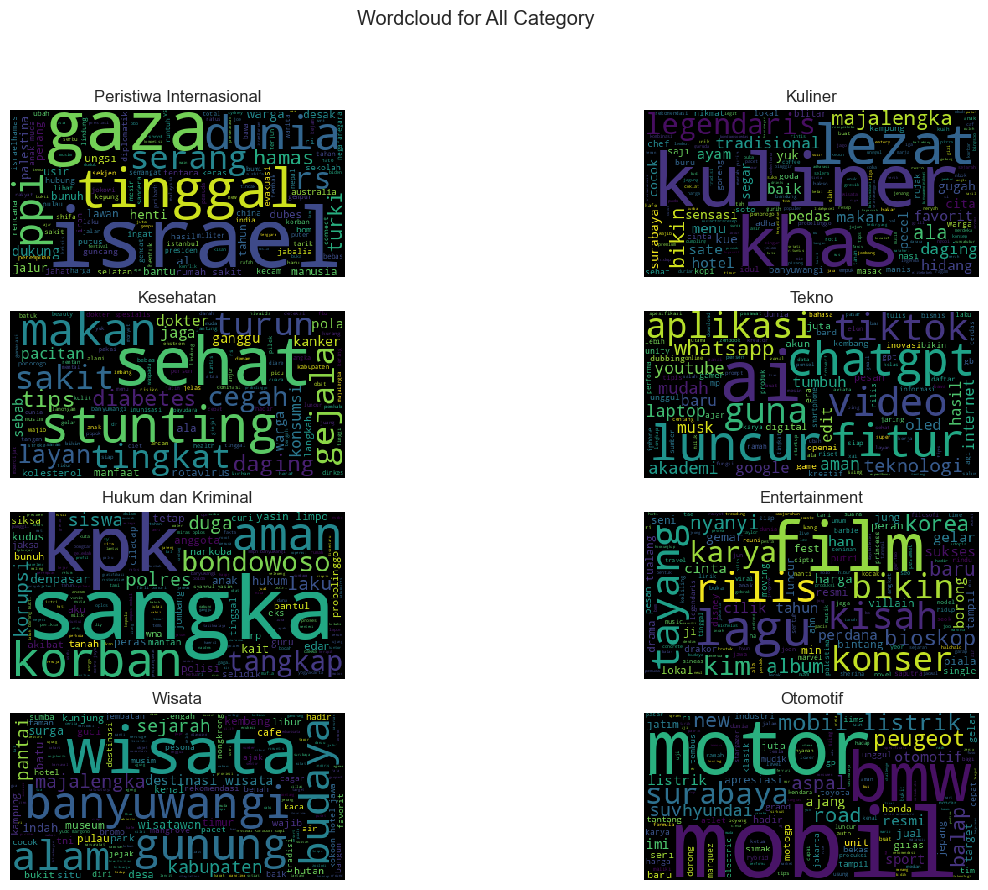

In [12]:
from wordcloud import WordCloud

def generate_wordcloud(data, category, axes):
    data = data[data.Kategori == category].Judul.str.cat()
    w = WordCloud().generate(data)
    axes.imshow(w, interpolation='nearest')
    axes.axis('off')
    axes.set_title(category)

fig, axes = plt.subplots(4,2, figsize=(15,10))
fig.suptitle('Wordcloud for All Category')
row = 0
col = 0
for cat in list(df_train.Kategori.unique()):
    generate_wordcloud(df_train, cat, axes[row, col])
    col += 1
    if col == 2:
        col = 0
        row += 1

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
max_features = 10000
# hitung idf
tfidf = TfidfVectorizer(max_features=max_features,
                        smooth_idf=False, ngram_range=(1, 1))
X_train_tfidf = tfidf.fit_transform(X_train['Judul'])
X_test_tfidf = tfidf.transform(X_test['Judul'])


# implementasi naive bayes
naive_bayes_classifier = MultinomialNB(alpha=1.1, fit_prior=False)
naive_bayes_classifier.fit(X_train_tfidf, y_train)

y_pred = naive_bayes_classifier.predict(X_test_tfidf)


akurasi = accuracy_score(y_test, y_pred)
print('Akurasi:\n', akurasi)

Akurasi:
 0.815


In [14]:
from sklearn.model_selection import RandomizedSearchCV
class Classifier(object):
    def __init__(self, model, param, n_cv=5):
        self.model = model
        self.param = param
        self.gs = RandomizedSearchCV(self.model, self.param
                               , cv=n_cv, error_score=0, refit=True)
    
    def fit(self, X, y):
        return self.gs.fit(X,y)
    
    def cv_predict(self, X_train, y_train, cv=15):
        return cross_val_predict(self.gs, X_train, y_train, cv=cv)

    def get_gs(self):
        return self.gs

In [15]:
config = {
    'lowercase':True,
    'ngram_range':(1,1),
    'analyzer': 'word',
    'max_features':10000
}
vectorizer_bow = TfidfVectorizer(**config)
X_train_bow = vectorizer_bow.fit_transform(X_train['Judul'])

clf_models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression()
}

clf_params = {
    'Naive Bayes': {
        'alpha':np.arange(0.5, 1.1, 0.1),
        'fit_prior': [True, False]
    }, 
    'Logistic Regression': {
        # 'tol': [1 / 10 ** 4, 1 / 10 ** 2],
        'C': np.arange(0.5, 1.1, 0.2),
        'solver': ['sag'],
        'max_iter': [250],
        'n_jobs': [-1]
    }
}

for key in list(clf_models.keys()):
    print(f'{key}')
    model = clf_models[key]
    param = clf_params[key]
    clf = Classifier(model, param, n_cv=5)
    print('---------- Fit the model using grid search')
    clf.fit(X_train_bow, y_train)
    print('---------- Predict the model using N fold Cv')
    y_train_pred = clf.cv_predict(X_train_bow, y_train, cv=5)
    gs = clf.get_gs()
    print(f'---------- Best Params {gs.best_params_}')
    print(f'---------- Accuracy : {accuracy_score(y_train, y_train_pred)}')
    print(f'---------- Precision : {precision_score(y_train, y_train_pred, average="macro")}')
    print(f"---------- Recall: {recall_score(y_train, y_train_pred, average='macro')}")
    print(f"---------- F1 Score: {f1_score(y_train, y_train_pred, average='macro')}")

Naive Bayes
---------- Fit the model using grid search
---------- Predict the model using N fold Cv
---------- Best Params {'fit_prior': False, 'alpha': 0.7}
---------- Accuracy : 0.8266666666666667
---------- Precision : 0.8275781067347991
---------- Recall: 0.8253619476561992
---------- F1 Score: 0.8252786588322936
Logistic Regression
---------- Fit the model using grid search
---------- Predict the model using N fold Cv
---------- Best Params {'solver': 'sag', 'n_jobs': -1, 'max_iter': 250, 'C': 1.0999999999999999}
---------- Accuracy : 0.8175
---------- Precision : 0.8237187496043303
---------- Recall: 0.815535776176025
---------- F1 Score: 0.8168190737683411


In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import multilabel_confusion_matrix

max_features = 10000
# hitung idf
tfidf = TfidfVectorizer(max_features=max_features,
                        smooth_idf=False, ngram_range=(1, 1))
X_train_tfidf = tfidf.fit_transform(X_train['Judul'])
X_test_tfidf = tfidf.transform(X_test['Judul'])


# implementasi naive bayes
naive_bayes_classifier = MultinomialNB(
    alpha=0.7999999999999999, fit_prior=True)
naive_bayes_classifier.fit(X_train_tfidf, y_train)

y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# https://stackoverflow.com/questions/53886370/multi-class-multi-label-confusion-matrix-with-sklearn
mlcf = multilabel_confusion_matrix(y_test, y_pred)
label_test = np.unique(y_test)

dict_res = {
    'labels': [],
    'TN': [],
    'FN': [],
    'TP': [],
    'FP': []
}

for index, val in enumerate(mlcf):
    dict_res['labels'].append(label_test[index])
    dict_res['TN'].append(val[0][0])
    dict_res['FN'].append(val[1][0])
    dict_res['TP'].append(val[1][1])
    dict_res['FP'].append(val[0][1])


MultinomialNB(alpha=0.7999999999999999)

In [24]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[35  1  0  1  0  1  0  4]
 [ 0 45  0  0  0  1  0  3]
 [ 3  3 37  3  2  4  2  4]
 [ 2  0  0 47  2  1  0  1]
 [ 2  4  0  2 35  0  0  0]
 [ 1  0  0  0  1 49  1  2]
 [ 1  0  1  1  7  1 45  0]
 [ 4  1  1  2  1  0  1 35]]


In [25]:
ndf = pd.DataFrame(dict_res)
print(ndf)

                    labels   TN  FN  TP  FP
0            Entertainment  345   7  35  13
1       Hukum dan Kriminal  342   4  45   9
2                Kesehatan  340  21  37   2
3                  Kuliner  338   6  47   9
4                 Otomotif  344   8  35  13
5  Peristiwa Internasional  338   5  49   8
6                    Tekno  340  11  45   4
7                   Wisata  341  10  35  14


In [26]:
cr = classification_report(y_test, y_pred)
print(cr)

                         precision    recall  f1-score   support

          Entertainment       0.73      0.83      0.78        42
     Hukum dan Kriminal       0.83      0.92      0.87        49
              Kesehatan       0.95      0.64      0.76        58
                Kuliner       0.84      0.89      0.86        53
               Otomotif       0.73      0.81      0.77        43
Peristiwa Internasional       0.86      0.91      0.88        54
                  Tekno       0.92      0.80      0.86        56
                 Wisata       0.71      0.78      0.74        45

               accuracy                           0.82       400
              macro avg       0.82      0.82      0.82       400
           weighted avg       0.83      0.82      0.82       400

